In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [3]:
df = pd.read_pickle("/Users/bogdanduminica/Desktop/tracking-barbell-exercises/data/interim/data_features_03.pkl")

In [4]:
df_train = df.drop(["participant", "category", "set"], axis = 1)

In [5]:
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,bench,heavy,B,64,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,bench,heavy,B,64,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,bench,heavy,B,64,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,bench,heavy,B,64,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,bench,heavy,B,64,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,row,medium,E,71,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,row,medium,E,71,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,medium,E,71,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


In [6]:
df_train

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,duration,pca_1,pca_2,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,bench,16.0,0.311963,-0.167364,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,bench,16.0,0.279209,-0.079385,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,bench,16.0,0.328399,-0.066606,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,bench,16.0,0.318289,-0.066734,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,bench,16.0,0.298084,-0.079820,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,row,19.0,-0.349738,-0.028197,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,row,19.0,-0.419648,-0.179453,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,19.0,-0.349351,-0.148450,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


In [7]:
X = df_train.drop("label", axis = 1)

In [8]:
X

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,duration,pca_1,pca_2,pca_3,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,16.0,0.311963,-0.167364,-0.013911,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,16.0,0.279209,-0.079385,0.045996,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,16.0,0.328399,-0.066606,0.032153,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,16.0,0.318289,-0.066734,0.040494,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,16.0,0.298084,-0.079820,0.046036,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,19.0,-0.349738,-0.028197,-0.069053,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,19.0,-0.419648,-0.179453,-0.048139,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,19.0,-0.349351,-0.148450,-0.053031,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


In [9]:
y = df_train["label"]

In [10]:
y

epoch (ms)
2019-01-11 15:08:08.000    bench
2019-01-11 15:08:08.400    bench
2019-01-11 15:08:08.800    bench
2019-01-11 15:08:09.200    bench
2019-01-11 15:08:09.600    bench
                           ...  
2019-01-20 17:33:26.200      row
2019-01-20 17:33:26.600      row
2019-01-20 17:33:27.000      row
2019-01-20 17:33:27.400      row
2019-01-20 17:33:27.800      row
Name: label, Length: 3868, dtype: object

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)

In [12]:
X_train

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,duration,pca_1,pca_2,pca_3,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-19 17:33:16.800,0.044966,-0.729516,0.153875,23.502193,-5.701669,-1.391100,19.0,-0.274760,0.002245,-0.033941,...,0.235926,289.174251,4.216748,0.459880,-36.582396,27.810967,-26.029368,29.108091,6.909835,3
2019-01-15 19:37:28.400,0.046367,-0.964470,0.014144,-27.106342,-5.041411,4.002810,29.0,-0.350313,-0.086902,-0.047942,...,0.532634,361.957413,65.850103,37.028618,58.620688,-39.163308,44.509841,52.721940,18.883458,0
2019-01-19 17:22:51.400,0.375352,0.791169,0.449213,6.805169,-5.046822,-1.962352,33.0,0.207909,0.285290,0.116582,...,0.611030,901.195192,-298.637483,-119.655077,45.670440,-170.740871,120.730945,15.463022,-5.064938,2
2019-01-11 16:24:45.400,0.044367,-1.233542,-0.057986,2.677950,-3.070809,3.796401,30.0,-0.440726,-0.138933,-0.026633,...,0.225092,298.993951,27.898708,6.545861,-2.708297,-55.463493,-9.581349,16.653542,1.415527,0
2019-01-20 17:31:03.400,-0.058843,-1.040965,-0.080392,1.006786,-1.945943,-0.246155,21.0,-0.365539,-0.163365,-0.059405,...,0.195813,233.341346,-7.248864,17.846796,-30.463345,22.832008,-8.905082,-3.851608,5.403792,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-14 13:55:50.000,-0.227150,0.758751,-0.251384,15.611756,0.933445,-22.659287,14.0,0.266468,-0.230753,0.006185,...,0.224031,363.426765,-12.387342,5.926513,4.281299,-82.725859,-1.229007,-12.009124,-11.774500,1
2019-01-15 14:06:54.200,0.071402,-1.308910,0.045379,26.814708,-8.389035,-12.571056,8.0,-0.471914,-0.076742,-0.023744,...,0.384841,301.123482,-10.662612,25.180426,7.276901,78.624759,-31.003564,-9.769925,-25.532918,0
2019-01-11 16:24:34.200,-0.047626,-0.903080,0.321965,-39.730589,2.114324,-11.411065,30.0,-0.328736,0.079152,-0.163296,...,0.437999,327.228982,68.740411,6.995489,65.598117,41.994127,-19.256168,-12.848075,-8.354428,3


In [13]:
X_test

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,duration,pca_1,pca_2,pca_3,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-14 13:27:05.000,-0.091875,0.624779,-0.391580,24.444167,-7.239013,-5.602389,12.0,0.212448,-0.294041,0.096302,...,0.300892,248.993238,38.683457,-8.791374,15.767705,-6.598377,-30.362690,-25.955082,15.011182,1
2019-01-14 13:57:35.600,-0.132043,0.914233,0.112817,-3.014059,-3.074463,-8.699491,18.0,0.302523,0.004351,-0.038217,...,0.271053,488.390952,-84.621273,57.916894,-5.486366,-53.217817,11.565810,-1.201181,-11.962877,1
2019-01-11 16:24:37.800,0.044199,-1.095219,-0.050170,-13.073737,-6.193956,-6.747921,30.0,-0.393409,-0.129597,-0.030751,...,0.498716,308.397364,-54.330536,14.797605,-76.404546,52.158661,8.623199,-19.524339,6.970028,0
2019-01-19 17:22:53.000,0.918433,-0.274413,0.006872,-8.058827,1.524559,2.551798,33.0,-0.190988,0.084796,0.398393,...,0.361846,898.033720,-102.182213,-153.336485,155.520840,8.674640,-80.126307,-18.693230,-1.629087,4
2019-01-15 19:12:12.400,0.368736,0.621699,0.630050,4.421008,-3.746559,0.768355,20.0,0.146223,0.384141,0.062496,...,0.315403,174.258769,-31.532909,19.542248,-7.798360,25.215105,2.024531,2.354893,3.229668,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-12 16:24:28.000,-0.013276,-0.730845,0.279724,26.103376,3.793862,6.579983,30.0,-0.273402,0.065918,-0.087763,...,0.416993,216.765255,11.603054,32.007701,-62.097947,-13.729325,-9.359292,0.255980,5.969099,3
2019-01-14 13:57:33.600,-0.021588,0.971798,0.325855,-1.798892,-3.079120,16.709695,18.0,0.307227,0.150295,-0.034741,...,0.357156,549.701933,78.527625,17.220846,-58.084145,58.346186,63.411059,47.895721,40.398174,2
2019-01-15 19:04:13.800,0.278978,0.563132,0.602616,-7.987382,-1.018759,1.980630,16.0,0.135005,0.350595,0.016536,...,0.636639,125.520013,-37.324097,35.802564,-21.544519,4.847998,4.235189,-0.397030,-2.846759,2


In [14]:
y_train

epoch (ms)
2019-01-19 17:33:16.800     row
2019-01-15 19:37:28.400    dead
2019-01-19 17:22:51.400    rest
2019-01-11 16:24:45.400    dead
2019-01-20 17:31:03.400     row
                           ... 
2019-01-14 13:55:50.000     ohp
2019-01-15 14:06:54.200     row
2019-01-11 16:24:34.200    dead
2019-01-15 19:32:46.800    dead
2019-01-16 19:26:34.400    dead
Name: label, Length: 2901, dtype: object

In [15]:
y_test

epoch (ms)
2019-01-14 13:27:05.000    bench
2019-01-14 13:57:35.600      ohp
2019-01-11 16:24:37.800     dead
2019-01-19 17:22:53.000     rest
2019-01-15 19:12:12.400    squat
                           ...  
2019-01-12 16:24:28.000     dead
2019-01-14 13:57:33.600      ohp
2019-01-15 19:04:13.800    squat
2019-01-11 16:19:48.200    squat
2019-01-15 19:30:53.600     dead
Name: label, Length: 967, dtype: object

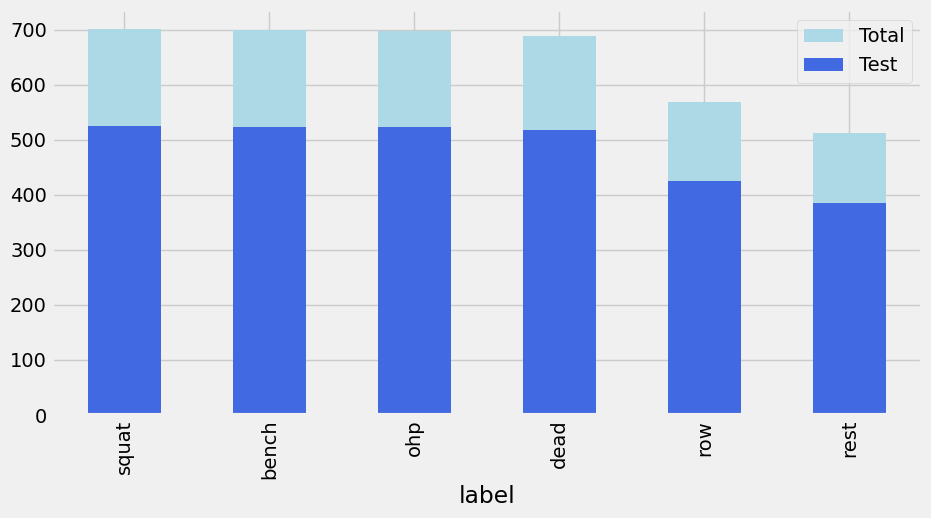

In [16]:
fig, ax = plt.subplots(figsize = (10, 5))
df_train["label"].value_counts().plot(kind = "bar", ax = ax, color = "lightblue", label = "Total")
y_train.value_counts().plot(kind = "bar", ax = ax, color = "royalblue", label = "Test")
plt.legend()
plt.show()

In [17]:
basic_features = ["acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z"]
square_features = ["acc_r", "gyr_r"]
pca_features = ["pca_1", "pca_2", "pca_3"]
time_features = [f for f in df_train.columns if "_temp_" in f]
freq_features = [f for f in df_train.columns if ("_freq_" in f) or ("_pse" in f)]
cluster_features = ["cluster"]

In [18]:
print("Basic features:", len(basic_features))
print("Square features:", len(square_features))
print("PCA features:", len(pca_features))
print("Time features:", len(time_features))
print("Frequency features:", len(freq_features))
print("Cluster features:", len(cluster_features))

Basic features: 6
Square features: 2
PCA features: 3
Time features: 16
Frequency features: 80
Cluster features: 1


In [19]:
feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + square_features + pca_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + freq_features + cluster_features))

In [20]:
learner = ClassificationAlgorithms()

In [21]:
max_features = 10

In [22]:
selected_features, ordered_features, ordered_cores = learner.forward_selection(max_features, X_train, y_train)

0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


1
2
3
4
5
6
7
8
9


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, c

In [23]:
selected_features

['pca_1',
 'duration',
 'acc_z_freq_0.0_Hz_ws_14',
 'acc_y_temp_mean_ws_5',
 'gyr_x_freq_1.071_Hz_ws_14',
 'gyr_y_freq_2.143_Hz_ws_14',
 'acc_z_freq_1.071_Hz_ws_14',
 'acc_r_freq_0.714_Hz_ws_14',
 'gyr_y_freq_1.429_Hz_ws_14',
 'gyr_y_freq_0.714_Hz_ws_14']

In [24]:
ordered_features

['pca_1',
 'duration',
 'acc_z_freq_0.0_Hz_ws_14',
 'acc_y_temp_mean_ws_5',
 'gyr_x_freq_1.071_Hz_ws_14',
 'gyr_y_freq_2.143_Hz_ws_14',
 'acc_z_freq_1.071_Hz_ws_14',
 'acc_r_freq_0.714_Hz_ws_14',
 'gyr_y_freq_1.429_Hz_ws_14',
 'gyr_y_freq_0.714_Hz_ws_14']

In [25]:
ordered_cores

[0.8876249569114099,
 0.9758703895208549,
 0.9972423302309549,
 0.9996552912788693,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

NameError: name 'a' is not defined

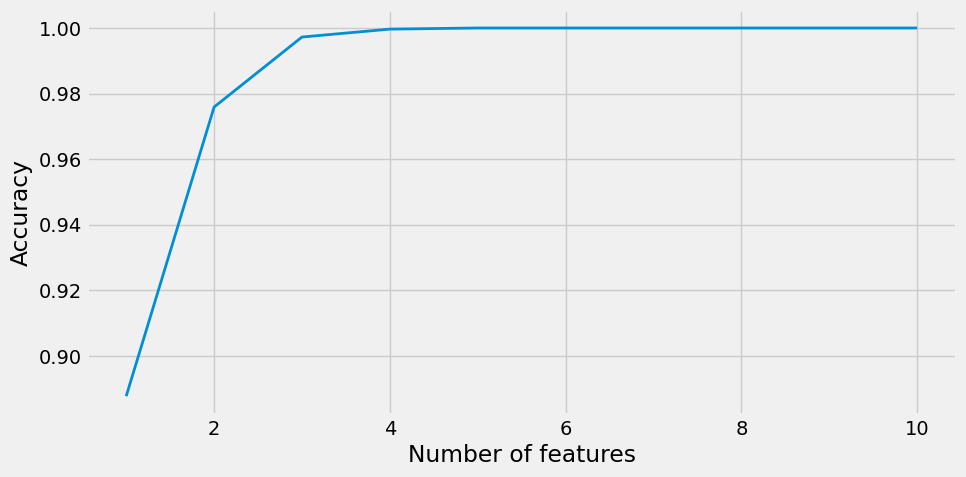

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, max_features + 1, 1), ordered_cores)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, max_features + 1, a))
plt.show()

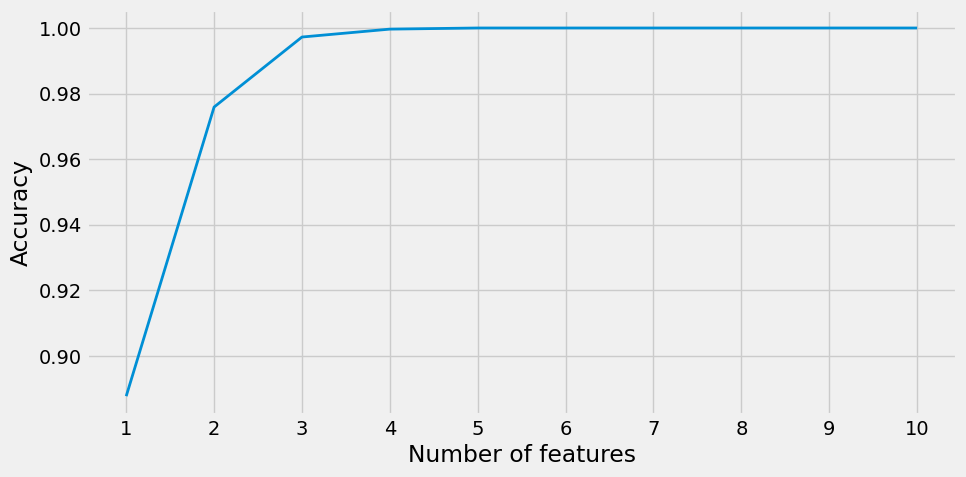

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, max_features + 1, 1), ordered_cores)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, max_features + 1, 1))
plt.show()

In [28]:
selected_features = ['pca_1',
                    'duration',
                    'acc_z_freq_0.0_Hz_ws_14',
                    'acc_y_temp_mean_ws_5',
                    'gyr_x_freq_1.071_Hz_ws_14',
                    'gyr_y_freq_2.143_Hz_ws_14',
                    'acc_z_freq_1.071_Hz_ws_14',
                    'acc_r_freq_0.714_Hz_ws_14',
                    'gyr_y_freq_1.429_Hz_ws_14',
                    'gyr_y_freq_0.714_Hz_ws_14']

In [29]:
possible_feature_sets = [feature_set_1, feature_set_2, feature_set_3, feature_set_4, selected_features]

In [30]:
feature_names = ["Feature Set 1", "Feature Set 2", "Feature Set 3", "Feature Set 4", "Selected Features"]

In [31]:
feature_set_3

['gyr_y_temp_mean_ws_5',
 'gyr_y',
 'gyr_x_temp_std_ws_5',
 'acc_y_temp_std_ws_5',
 'acc_z_temp_mean_ws_5',
 'acc_x_temp_std_ws_5',
 'gyr_r',
 'gyr_z_temp_mean_ws_5',
 'acc_r',
 'pca_3',
 'acc_r_temp_std_ws_5',
 'gyr_z',
 'gyr_r_temp_mean_ws_5',
 'acc_y_temp_mean_ws_5',
 'acc_y',
 'pca_1',
 'acc_x',
 'acc_r_temp_mean_ws_5',
 'gyr_r_temp_std_ws_5',
 'gyr_x_temp_mean_ws_5',
 'gyr_y_temp_std_ws_5',
 'acc_z_temp_std_ws_5',
 'gyr_x',
 'acc_x_temp_mean_ws_5',
 'gyr_z_temp_std_ws_5',
 'acc_z',
 'pca_2']

In [32]:
iteration = 1

In [33]:
score_df = pd.DataFrame()

In [34]:
iteratios = 1

In [35]:
iterations = 1

In [36]:
iterations = 1
score_df = pd.DataFrame()

In [37]:
for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]
    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0
    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)
        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)
    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations
    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)
    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)
    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)
    performance_test_nb = accuracy_score(y_test, class_test_y)
    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [38]:
score_df

,model,feature_set,accuracy
0,NN,Feature Set 1,0.933816
1,RF,Feature Set 1,0.959669
2,KNN,Feature Set 1,0.803516
3,DT,Feature Set 1,0.932782
4,NB,Feature Set 1,0.854188
0,NN,Feature Set 2,0.934850
1,RF,Feature Set 2,0.961737
2,KNN,Feature Set 2,0.800414
3,DT,Feature Set 2,0.932782
4,NB,Feature Set 2,0.859359


In [39]:
score_df.sort_values(by = "accuracy", ascending=False)

,model,feature_set,accuracy
0,NN,Feature Set 4,0.996898
1,RF,Feature Set 4,0.994829
1,RF,Selected Features,0.992761
3,DT,Selected Features,0.988625
0,NN,Feature Set 3,0.984488
3,DT,Feature Set 4,0.983454
1,RF,Feature Set 3,0.982420
2,KNN,Feature Set 4,0.968976
1,RF,Feature Set 2,0.961737
1,RF,Feature Set 1,0.959669


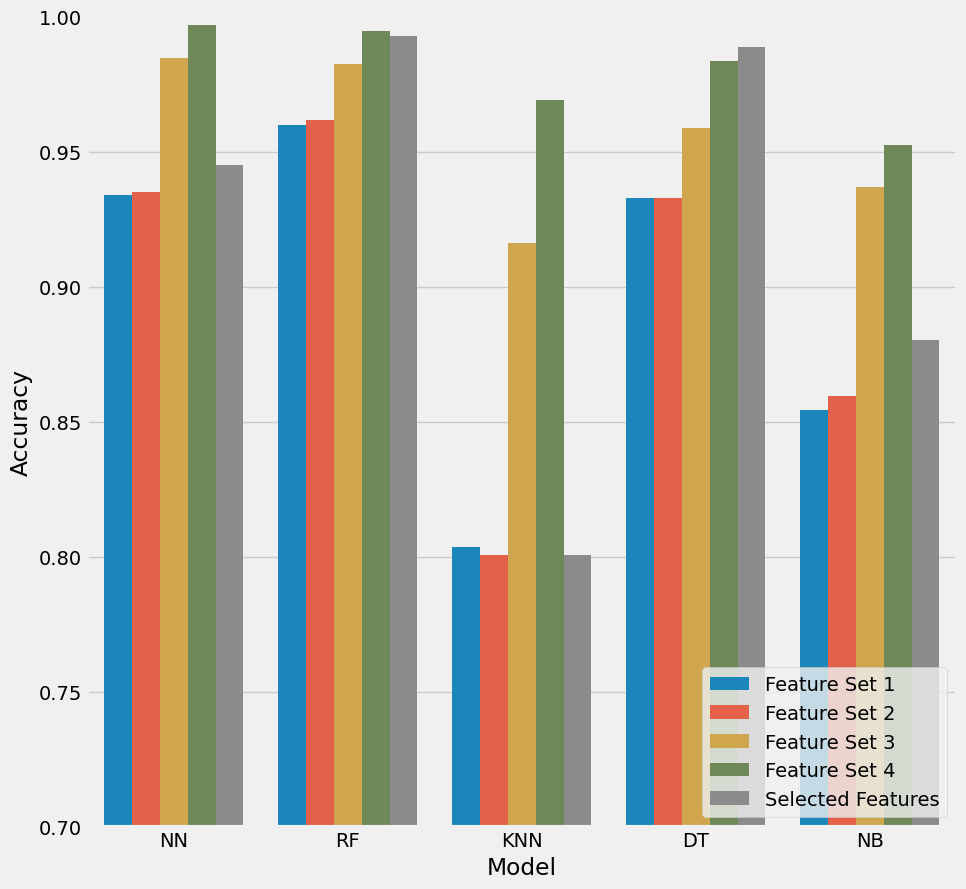

In [40]:
plt.figure(figsize=(10, 10))
sns.barplot(x="model", y="accuracy", hue="feature_set", data=score_df)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1)
plt.legend(loc="lower right")
plt.show()

In [41]:
X_train[feature_set_4]

,gyr_y_temp_mean_ws_5,acc_y_freq_1.786_Hz_ws_14,gyr_y_freq_2.5_Hz_ws_14,gyr_x_freq_2.5_Hz_ws_14,acc_z_freq_1.071_Hz_ws_14,gyr_r_freq_weighted,acc_y_temp_std_ws_5,gyr_x_freq_2.143_Hz_ws_14,acc_x_temp_std_ws_5,gyr_r,...,gyr_y_freq_1.786_Hz_ws_14,acc_y_freq_1.071_Hz_ws_14,acc_z_freq_weighted,gyr_z_freq_0.714_Hz_ws_14,acc_y_freq_0.714_Hz_ws_14,gyr_z_freq_0.357_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_y_freq_1.071_Hz_ws_14,gyr_x,acc_z_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-19 17:33:16.800,-7.465721,-0.512281,6.774249,-17.931488,0.095231,0.120517,0.201815,-20.395559,0.030203,24.223898,...,11.195216,0.412514,1.343944,55.418853,0.593781,-13.755800,-26.029368,-22.630205,23.502193,-0.145858
2019-01-15 19:37:28.400,-2.267152,0.021439,1.851850,-28.955709,0.061968,0.493750,0.077934,-29.822625,0.004308,27.860224,...,3.150934,0.168316,0.961461,1.068637,-0.336387,14.810710,44.509841,8.165277,-27.106342,0.164378
2019-01-19 17:22:51.400,32.361816,-0.527422,24.580617,2.182249,-0.513062,-0.308864,0.036123,2.660803,0.077121,8.696641,...,25.532658,-0.592477,-1.858455,2.301838,0.137919,234.509681,120.730945,-224.487111,6.805169,-0.234624
2019-01-11 16:24:45.400,-4.884088,-0.031160,-3.487570,3.317941,-0.053338,-0.160030,0.084696,2.842760,0.004425,5.569017,...,-3.547615,-0.402478,1.358369,-0.813607,-0.883013,14.844903,-9.581349,17.536456,2.677950,-0.010106
2019-01-20 17:31:03.400,1.039804,0.246938,-0.789442,-1.607474,0.528462,-0.002156,0.225782,-1.313806,0.045129,2.204746,...,-1.365286,1.944465,1.518891,-38.153123,0.040517,69.608686,-8.905082,-13.977621,1.006786,0.114608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-14 13:55:50.000,-1.438230,0.033103,-0.910718,-3.874464,-0.002259,-0.675273,0.039435,-4.129425,0.035877,27.532554,...,-1.124613,0.076111,0.121548,-45.995816,-0.501625,28.316812,-1.229007,-25.590207,15.611756,-0.008456
2019-01-15 14:06:54.200,1.412735,-0.053161,1.706872,-7.938803,-0.024021,-0.017364,0.261022,-8.339504,0.016827,30.780447,...,2.028696,-0.110442,-1.102134,-62.792282,-1.002443,-6.629597,-31.003564,8.968820,26.814708,-0.077611
2019-01-11 16:24:34.200,1.129803,0.011670,-2.305189,3.122621,-0.242314,0.163773,0.094047,3.664849,0.033121,41.390850,...,-1.859636,0.456614,0.174076,-10.057044,-0.182465,-45.596005,-19.256168,-11.769967,-39.730589,0.040517


In [42]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.feedforward_neural_network(
X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [43]:
accuracy = accuracy_score(y_test, class_test_y)

In [44]:
accuracy

0.9958634953464323

In [45]:
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)

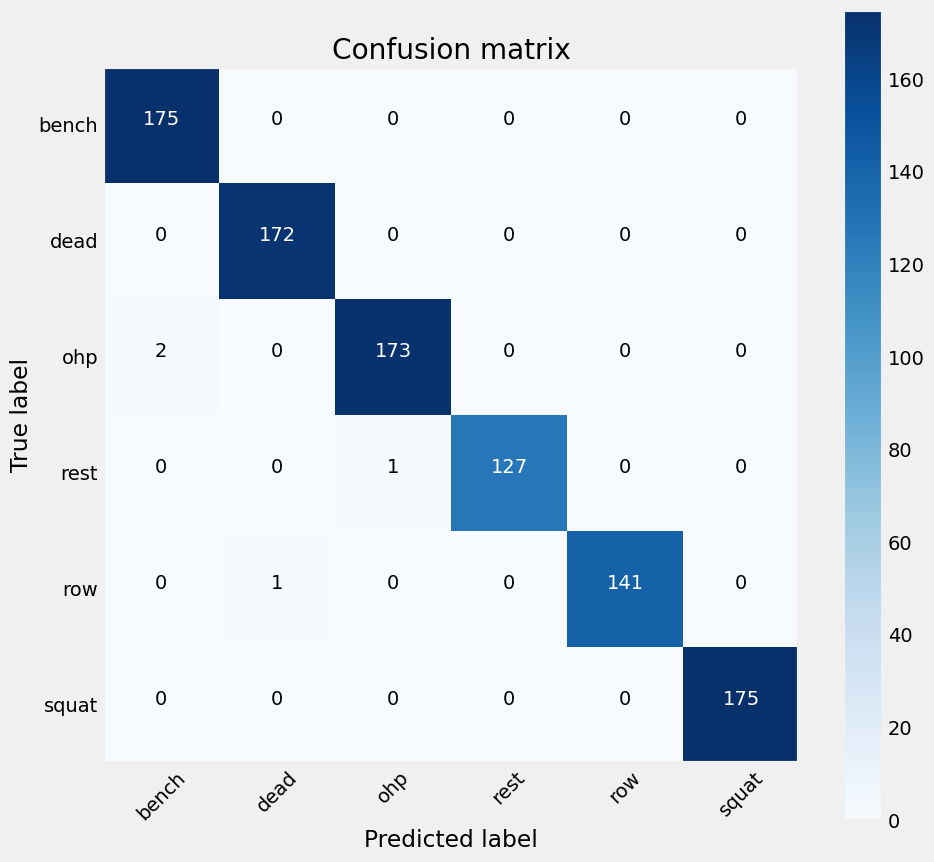

In [46]:
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [47]:
participant_df = df.dtop(["set", "category"], axis = 1)

AttributeError: 'DataFrame' object has no attribute 'dtop'

In [48]:
participant_df = df.drop(["set", "category"], axis = 1)

In [49]:
participant_df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,participant,duration,pca_1,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,bench,B,16.0,0.311963,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,bench,B,16.0,0.279209,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,bench,B,16.0,0.328399,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,bench,B,16.0,0.318289,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,bench,B,16.0,0.298084,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,row,E,19.0,-0.349738,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,row,E,19.0,-0.419648,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,E,19.0,-0.349351,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


In [50]:
X_train = participant_df[participant_df["participant"] != "A"].drop("label", axis = 1)

In [51]:
y_train = participant_df[participant_df["participant"] != "A"]["label"]

In [52]:
X_train = participant_df[participant_df["participant"] == "A"].drop("label", axis = 1)
y_train = participant_df[participant_df["participant"] == "A"]["label"]

In [53]:
X_train = participant_df[participant_df["participant"] != "A"].drop("label", axis = 1)
y_train = participant_df[participant_df["participant"] != "A"]["label"]

In [54]:
X_test = participant_df[participant_df["participant"] == "A"].drop("label", axis = 1)
y_test = participant_df[participant_df["participant"] == "A"]["label"]

In [55]:
X_train

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,duration,pca_1,pca_2,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,B,16.0,0.311963,-0.167364,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,B,16.0,0.279209,-0.079385,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,B,16.0,0.328399,-0.066606,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,B,16.0,0.318289,-0.066734,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,B,16.0,0.298084,-0.079820,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,E,19.0,-0.349738,-0.028197,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,E,19.0,-0.419648,-0.179453,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,19.0,-0.349351,-0.148450,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


In [56]:
X_test

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,duration,pca_1,pca_2,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:10:11.400,-0.013533,0.916607,-0.153791,13.149052,-2.886526,-15.253865,A,16.0,0.299379,-0.131010,...,0.185668,219.511503,0.806165,-14.062901,12.346567,-16.949678,-26.630250,-13.734824,-4.732672,1
2019-01-11 15:10:11.800,-0.103125,0.840104,-0.212726,7.291259,-12.435341,0.003996,A,16.0,0.282742,-0.183921,...,0.159581,231.627897,12.183873,16.580827,-24.455258,9.412739,-1.985534,16.408055,6.489455,1
2019-01-11 15:10:12.200,-0.114312,1.216864,-0.165049,-7.295151,-3.512055,-1.432389,A,16.0,0.411240,-0.144619,...,0.129569,222.348452,-4.643629,-6.383668,13.878055,-12.139379,18.989031,14.043839,6.265195,1
2019-01-11 15:10:12.600,-0.177597,0.956484,-0.201318,10.001542,6.988136,-13.956208,A,16.0,0.328436,-0.185760,...,0.133081,226.234920,-5.871263,-4.721431,9.047734,16.615033,-20.058567,-15.479272,-5.559087,1
2019-01-11 15:10:13.000,-0.171448,0.943575,-0.211396,-16.687208,0.375845,20.254579,A,16.0,0.324436,-0.190885,...,0.231134,226.917382,-3.967528,12.174834,-19.209180,-11.298712,4.488134,-28.289310,-26.901497,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-19 17:26:17.800,0.191921,-0.875465,0.459203,20.669510,3.888485,-9.441518,A,39.0,-0.344912,0.201721,...,0.179813,423.154658,-39.417659,39.041518,-2.755949,-36.172180,-35.092716,4.610073,-0.130180,3
2019-01-19 17:26:18.200,0.160804,-0.829827,0.512937,-17.782526,25.213245,-0.495340,A,39.0,-0.327196,0.230228,...,0.331763,410.122435,-62.742118,75.710291,4.977822,46.196356,3.596586,20.287865,-10.525555,3
2019-01-19 17:26:18.600,0.201590,-0.885545,0.518138,-0.945156,25.446345,-26.518827,A,39.0,-0.350281,0.238253,...,0.175199,427.949102,-15.638249,-31.451126,10.082971,-47.970396,29.056135,-1.233151,-31.921526,3


In [57]:
X_train = X_train.drop(["participant"], axis = 1)
X_test = X_test.drop(["participant"], axis = 1)

ValueError: Invalid color doddgerblue

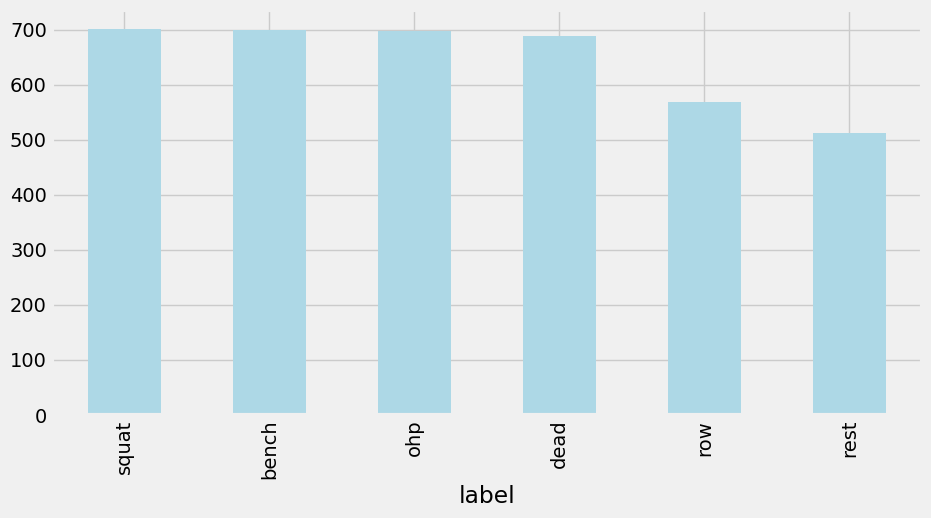

In [58]:
fig, ax = plt.subplots(figsize = (10, 5))
df_train["label"].value_counts().plot(kind = "bar", ax = ax, color = "lightblue", label = "Total")
y_train.value_counts().plot(kind = "bar", ax = ax, color = "doddgerblue", label = "Train")
y_test.value_counts().plot(kind = "bar", ax = ax, color = "royalblue", label = "Test")
plt.legend()
plt.show()

In [59]:
X_train = X_train.drop(["participant"], axis = 1)
X_test = X_test.drop(["participant"], axis = 1)
fig, ax = plt.subplots(figsize = (10, 5))
df_train["label"].value_counts().plot(kind = "bar", ax = ax, color = "lightblue", label = "Total")
y_train.value_counts().plot(kind = "bar", ax = ax, color = "dodgerblue", label = "Train")
y_test.value_counts().plot(kind = "bar", ax = ax, color = "royalblue", label = "Test")
plt.legend()
plt.show()

KeyError: "['participant'] not found in axis"

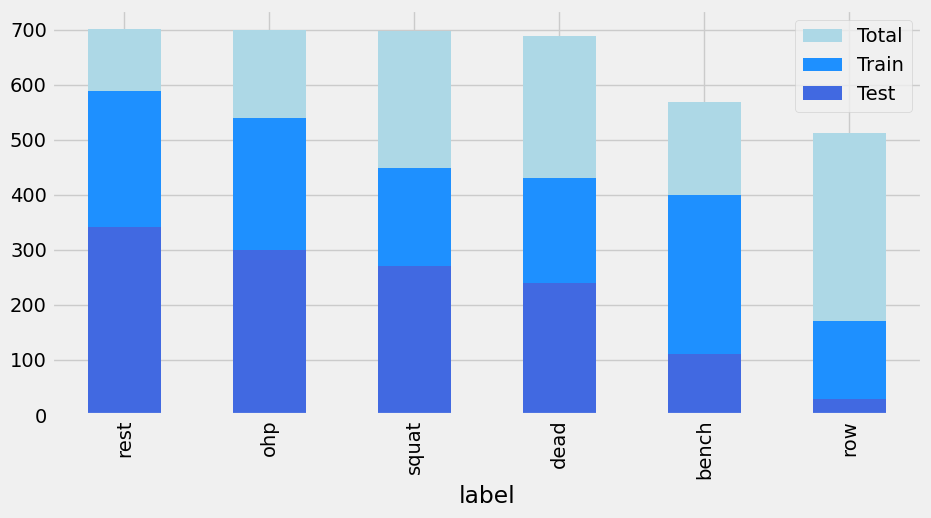

In [60]:
fig, ax = plt.subplots(figsize = (10, 5))
df_train["label"].value_counts().plot(kind = "bar", ax = ax, color = "lightblue", label = "Total")
y_train.value_counts().plot(kind = "bar", ax = ax, color = "dodgerblue", label = "Train")
y_test.value_counts().plot(kind = "bar", ax = ax, color = "royalblue", label = "Test")
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


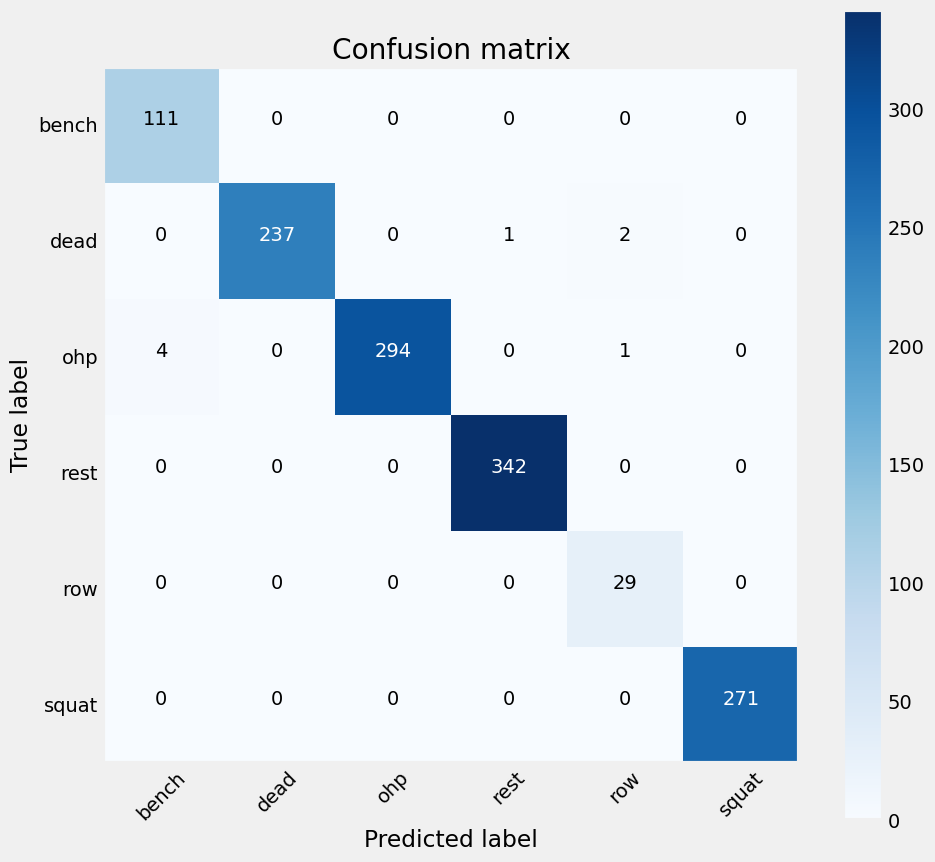

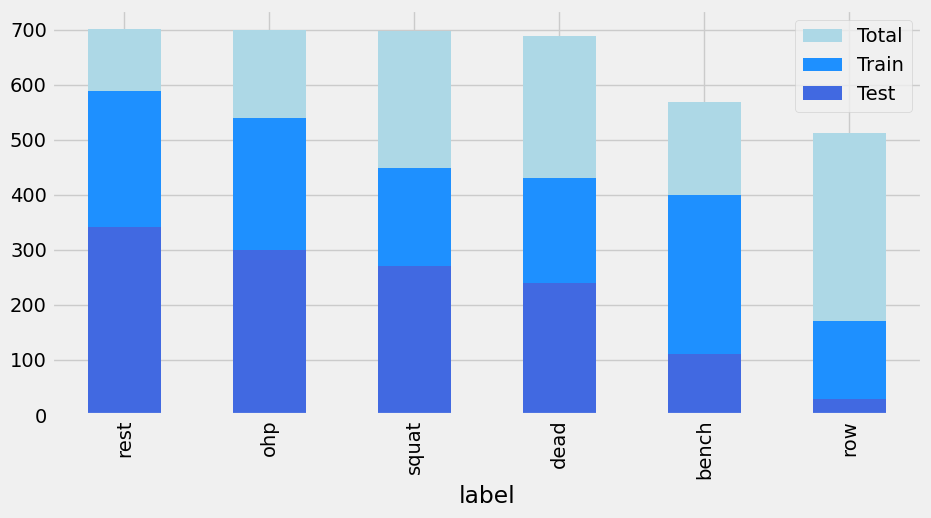

In [61]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.feedforward_neural_network(
X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True
)

accuracy = accuracy_score(y_test, class_test_y)
# build the confusion matrix

classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)
# create confusion matrix for cm

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()
# Select train and test data based on participant

participant_df = df.drop(["set", "category"], axis = 1)
X_train = participant_df[participant_df["participant"] != "A"].drop("label", axis = 1)
y_train = participant_df[participant_df["participant"] != "A"]["label"]
X_test = participant_df[participant_df["participant"] == "A"].drop("label", axis = 1)
y_test = participant_df[participant_df["participant"] == "A"]["label"]
# drop participant to keep it clean

X_train = X_train.drop(["participant"], axis = 1)
X_test = X_test.drop(["participant"], axis = 1)
fig, ax = plt.subplots(figsize = (10, 5))
df_train["label"].value_counts().plot(kind = "bar", ax = ax, color = "lightblue", label = "Total")
y_train.value_counts().plot(kind = "bar", ax = ax, color = "dodgerblue", label = "Train")
y_test.value_counts().plot(kind = "bar", ax = ax, color = "royalblue", label = "Test")
plt.legend()
plt.show()

In [62]:
accuracy

0.9938080495356038

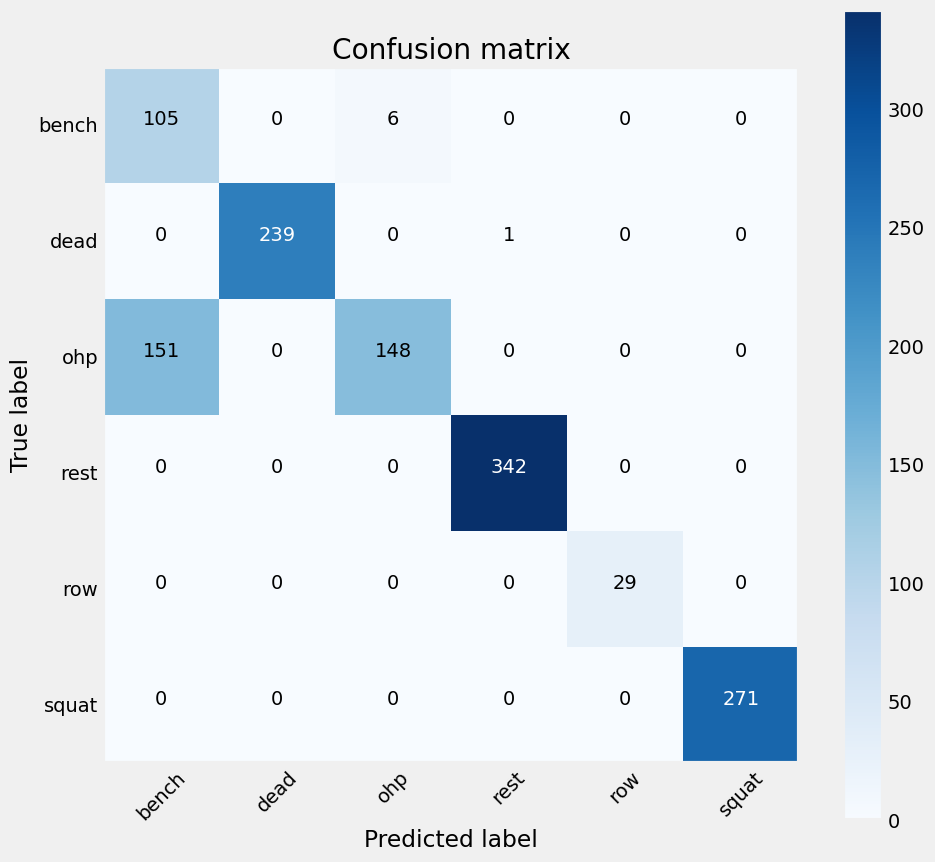

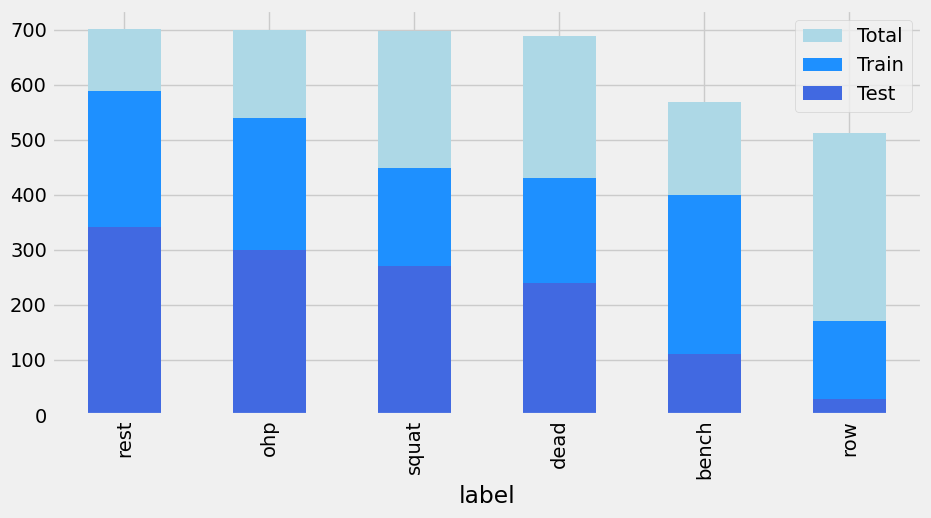

In [63]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.feedforward_neural_network(
X_train[selected_features], y_train, X_test[selected_features], gridsearch=False
)

accuracy = accuracy_score(y_test, class_test_y)
# build the confusion matrix

classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)
# create confusion matrix for cm

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()
# Select train and test data based on participant

participant_df = df.drop(["set", "category"], axis = 1)
X_train = participant_df[participant_df["participant"] != "A"].drop("label", axis = 1)
y_train = participant_df[participant_df["participant"] != "A"]["label"]
X_test = participant_df[participant_df["participant"] == "A"].drop("label", axis = 1)
y_test = participant_df[participant_df["participant"] == "A"]["label"]
# drop participant to keep it clean

X_train = X_train.drop(["participant"], axis = 1)
X_test = X_test.drop(["participant"], axis = 1)
fig, ax = plt.subplots(figsize = (10, 5))
df_train["label"].value_counts().plot(kind = "bar", ax = ax, color = "lightblue", label = "Total")
y_train.value_counts().plot(kind = "bar", ax = ax, color = "dodgerblue", label = "Train")
y_test.value_counts().plot(kind = "bar", ax = ax, color = "royalblue", label = "Test")
plt.legend()
plt.show()

In [64]:
accuracy

0.8777089783281734

In [65]:
selected_features = [
    "acc_z_freq_0.0_Hz_ws_14",
    "acc_x_freq_0.0_Hz_ws_14",
    "gyr_r_freq_0.0_Hz_ws_14",
    "acc_z",
    "pca_1",
    "acc_r_temp_std_ws_5",
    "gyr_y_temp_std_ws_5",
    "acc_z_freq_1.429_Hz_ws_14",
    "gyr_z_freq_1.071_Hz_ws_14",
    "gyr_x_temp_std_ws_5"
]

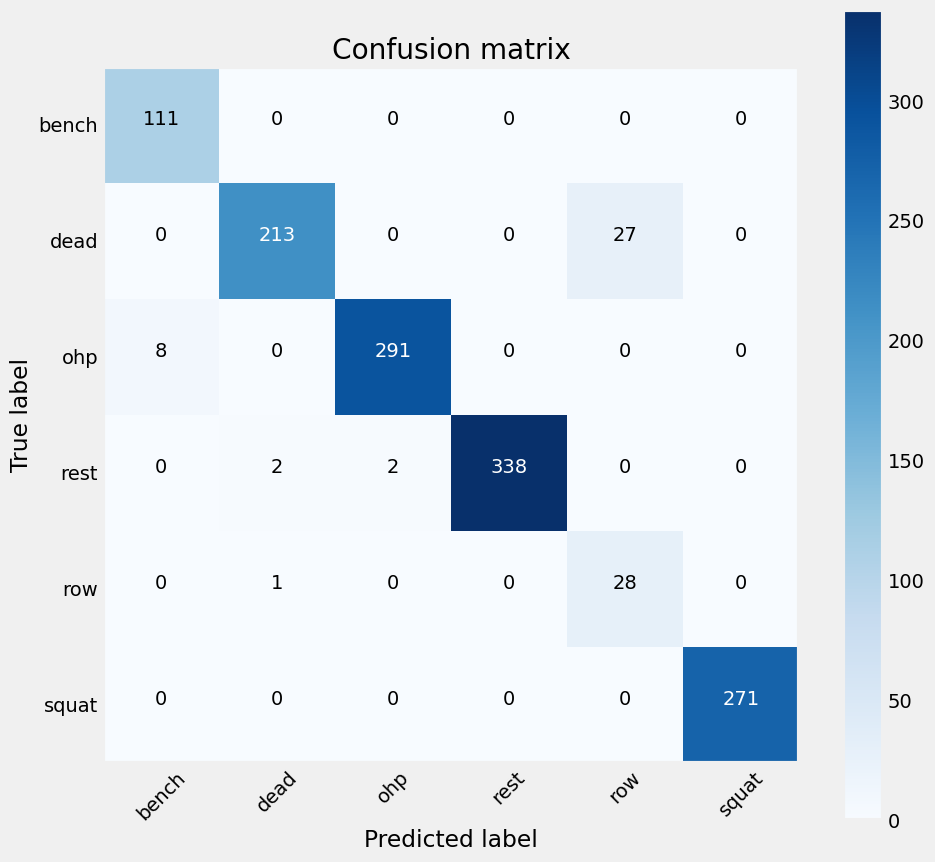

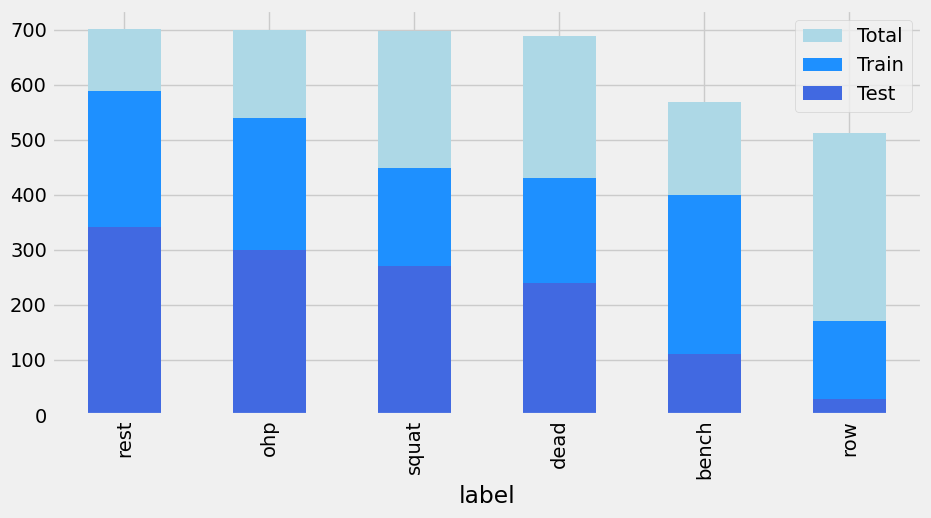

In [66]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.feedforward_neural_network(
X_train[selected_features], y_train, X_test[selected_features], gridsearch=False
)

accuracy = accuracy_score(y_test, class_test_y)
# build the confusion matrix

classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)
# create confusion matrix for cm

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()
# Select train and test data based on participant

participant_df = df.drop(["set", "category"], axis = 1)
X_train = participant_df[participant_df["participant"] != "A"].drop("label", axis = 1)
y_train = participant_df[participant_df["participant"] != "A"]["label"]
X_test = participant_df[participant_df["participant"] == "A"].drop("label", axis = 1)
y_test = participant_df[participant_df["participant"] == "A"]["label"]
# drop participant to keep it clean

X_train = X_train.drop(["participant"], axis = 1)
X_test = X_test.drop(["participant"], axis = 1)
fig, ax = plt.subplots(figsize = (10, 5))
df_train["label"].value_counts().plot(kind = "bar", ax = ax, color = "lightblue", label = "Total")
y_train.value_counts().plot(kind = "bar", ax = ax, color = "dodgerblue", label = "Train")
y_test.value_counts().plot(kind = "bar", ax = ax, color = "royalblue", label = "Test")
plt.legend()
plt.show()

In [67]:
accuracy

0.9690402476780186

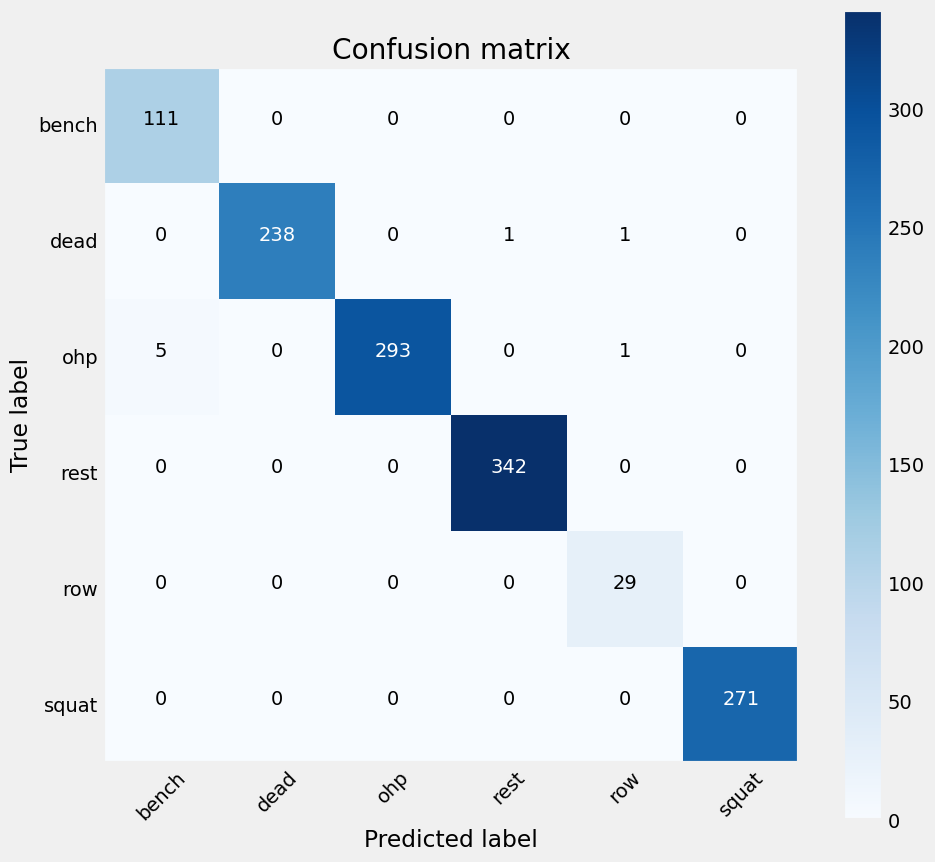

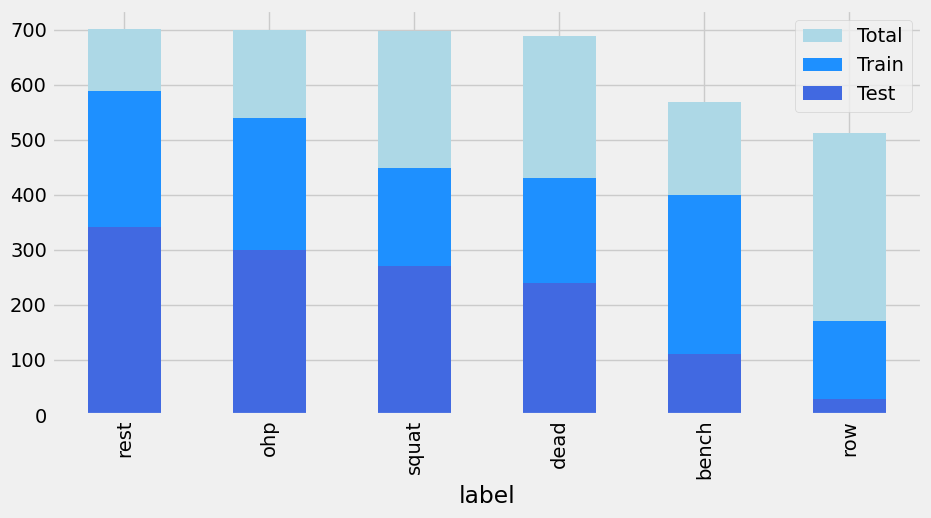

In [68]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.feedforward_neural_network(
X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=False
)

accuracy = accuracy_score(y_test, class_test_y)
# build the confusion matrix

classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)
# create confusion matrix for cm

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()
# Select train and test data based on participant

participant_df = df.drop(["set", "category"], axis = 1)
X_train = participant_df[participant_df["participant"] != "A"].drop("label", axis = 1)
y_train = participant_df[participant_df["participant"] != "A"]["label"]
X_test = participant_df[participant_df["participant"] == "A"].drop("label", axis = 1)
y_test = participant_df[participant_df["participant"] == "A"]["label"]
# drop participant to keep it clean

X_train = X_train.drop(["participant"], axis = 1)
X_test = X_test.drop(["participant"], axis = 1)
fig, ax = plt.subplots(figsize = (10, 5))
df_train["label"].value_counts().plot(kind = "bar", ax = ax, color = "lightblue", label = "Total")
y_train.value_counts().plot(kind = "bar", ax = ax, color = "dodgerblue", label = "Train")
y_test.value_counts().plot(kind = "bar", ax = ax, color = "royalblue", label = "Test")
plt.legend()
plt.show()

In [69]:
accuracy

0.9938080495356038